In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
%matplotlib inline
from pandas import DataFrame, Series
import pandas_datareader as pdr
import json 

import plotly.plotly as py
from plotly.graph_objs import *
import scipy as sp
import plotly.plotly as py
import plotly.figure_factory as ff

import datetime as dt
import networkx as nx

plt.style.use('ggplot')
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', '_classic_test']


In [2]:
data_file = pd.read_csv('Dec2017keywordscopy2.csv', delimiter=',')


pd.set_option('display.max_rows', 145)  


data_file

,Key-values,Total Active View % viewable impressions,Ad server downloaded impressions,Ad server average eCPM ($),Ad server CTR in %
0,texture,0.6819,1208,1.84,0.0008
1,breast,0.4002,18134,1.68,0.0002
2,nap,0.3993,37173,1.84,0.0004
3,summer,0.5502,3684036,1.48,0.0005
4,favorable,0.6618,2957,2.15,0.0010
5,lineage,0.5745,200,2.55,0.0000
6,establish,0.6156,1622,2.62,0.0037
7,accompany,0.5704,1415,2.29,0.0007
8,serve,0.4516,335874,1.40,0.0003
9,soul,0.5247,36097,1.32,0.0003


In [3]:
ecpm = data_file['Ad server average eCPM ($)']
kv = data_file['Key-values']
vimp = data_file['Total Active View % viewable impressions']
dimp = data_file['Ad server downloaded impressions']
ctr = data_file['Ad server CTR in %']

In [4]:
#keywords under $1.00 ecpm

one_ecpm = data_file.loc[ecpm < 1.00, ['Key-values', 'Ad server average eCPM ($)']]

one_ecpm

,Key-values,Ad server average eCPM ($)
23,disgrace,0.95
38,artist,0.68
48,investigation,0.96
67,coalition,0.68
73,autonomy,0.84
81,quotation,0.50
83,posture,0.84
97,global,0.96
133,nuclear,0.84
140,color,0.50


In [5]:
#keywords between greater than $2.00 ecpm

two_ecpm = data_file.loc[ecpm > 2.00, ['Key-values', 'Ad server average eCPM ($)']]

two_ecpm

,Key-values,Ad server average eCPM ($)
4,favorable,2.15
5,lineage,2.55
6,establish,2.62
7,accompany,2.29
11,witness,2.33
15,unity,2.28
18,confession,2.23
19,new,2.95
21,lick,3.26
25,peace,2.07


In [6]:
"""
60 accounts where the ecpm is greater than $2.00
mean = 2.97
standard deviation = 1.48
minimum = $2.01
maximum = $11.69
"""


two_ecpm.describe()

,Ad server average eCPM ($)
count,60.000000
mean,2.971333
std,1.480696
min,2.010000
25%,2.267500
50%,2.535000
75%,2.972500
max,11.690000


In [10]:
over2ecpm = data_file.loc[ecpm > 2.00, ['Ad server average eCPM ($)']]
under1ecpm = data_file.loc[ecpm < 1.00, ['Ad server average eCPM ($)']]

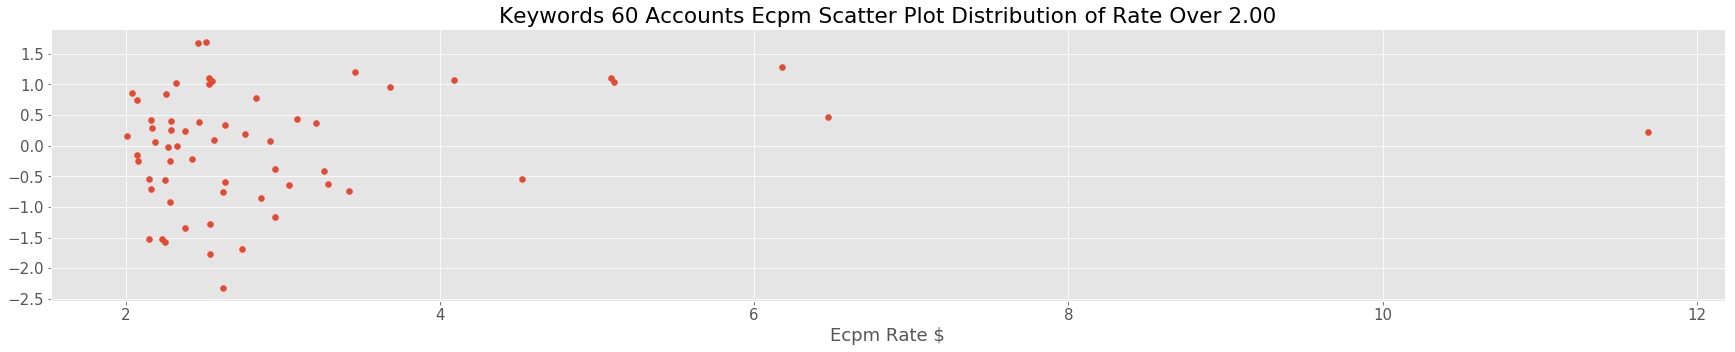

In [9]:
"""
-distribution plot of keywords producing over $2.00
-concentration is between $2.00 and $3.60

"""

y = np.random.randn(60)

plt.scatter(over2ecpm, y)

ax = plt.axes()
plt.xlabel('Ecpm Rate $')
plt.title('Keywords 60 Accounts Ecpm Scatter Plot Distribution of Rate Over 2.00')
plt.rcParams['font.size'] = 15

plt.rcParams["figure.figsize"] = (30,5)
plt.show()

In [13]:
# list of which keywords between $1.00 and $2.00 ecpm
one_two_ecpm = data_file.loc[(ecpm > 1.00) & (ecpm < 2.00), ['Key-values', 'Ad server average eCPM ($)']]
between1and2ecpm = data_file.loc[(ecpm > 1.00) & (ecpm < 2.00), ['Ad server average eCPM ($)']]
one_two_ecpm

,Key-values,Ad server average eCPM ($)
0,texture,1.84
1,breast,1.68
2,nap,1.84
3,summer,1.48
8,serve,1.40
9,soul,1.32
10,primary,1.40
12,abbey,1.68
13,crude,1.23
14,definition,1.54


In [12]:
"""
74 accounts of keywords between $1.00 and $2.00
mean: $1.58
standard deviation: .22
mimimum = $1.08
maximum = $1.99
"""

one_two_ecpm.describe()

,Ad server average eCPM ($)
count,74.000000
mean,1.583108
std,0.223103
min,1.080000
25%,1.412500
50%,1.585000
75%,1.770000
max,1.990000


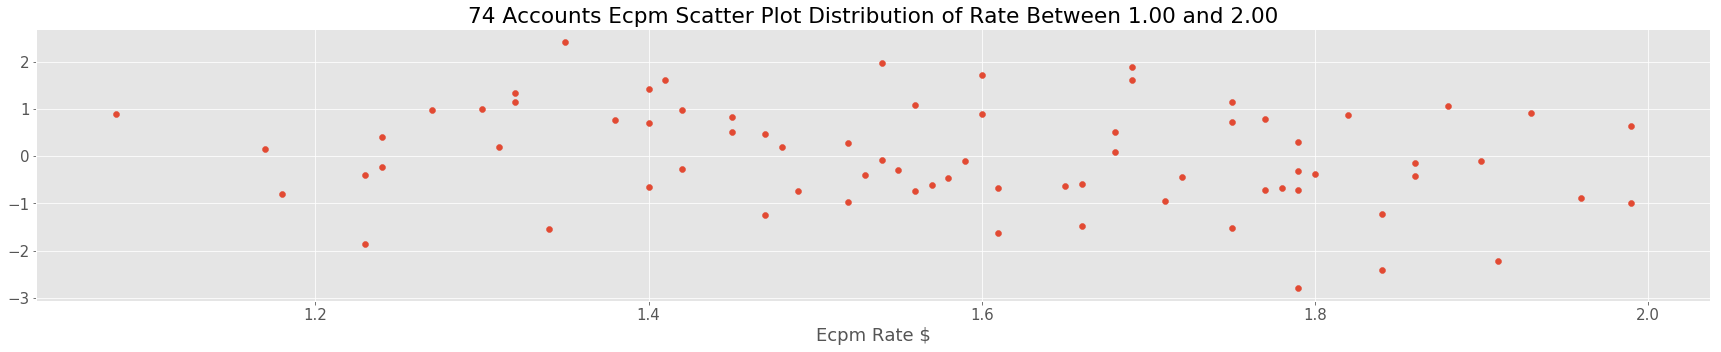

In [14]:
"""
-distribution plot of keywords producing between $1.00 - $2.00
-biggest concentration is between $1.40 and $1.80
"""

y = np.random.randn(74)

plt.scatter(between1and2ecpm, y)

ax = plt.axes()
plt.xlabel('Ecpm Rate $')
plt.title('74 Accounts Ecpm Scatter Plot Distribution of Rate Between 1.00 and 2.00')
plt.rcParams['font.size'] = 20

plt.rcParams["figure.figsize"] = (30,5)
plt.show()

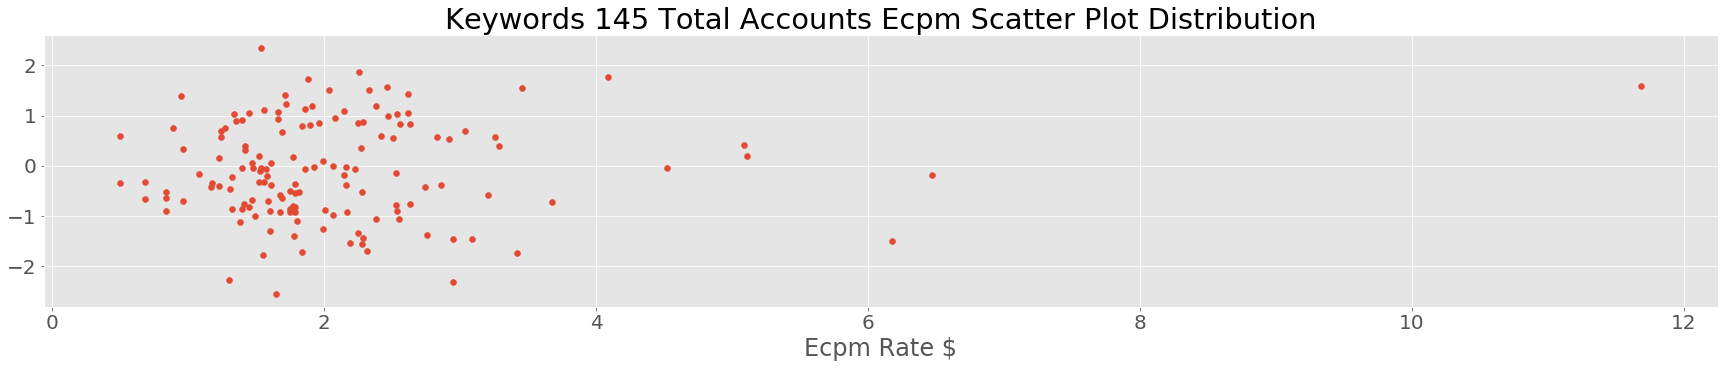

In [15]:
"""
-Concentration of the entire data set of 145 total accounts
-biggest concentation is between $1.50 to $3.20
"""

y = np.random.randn(145)

plt.scatter(ecpm, y)

ax = plt.axes()
plt.xlabel('Ecpm Rate $')
plt.title('Keywords 145 Total Accounts Ecpm Scatter Plot Distribution')
plt.rcParams['font.size'] = 20


plt.rcParams["figure.figsize"] = (30,5)
plt.show()

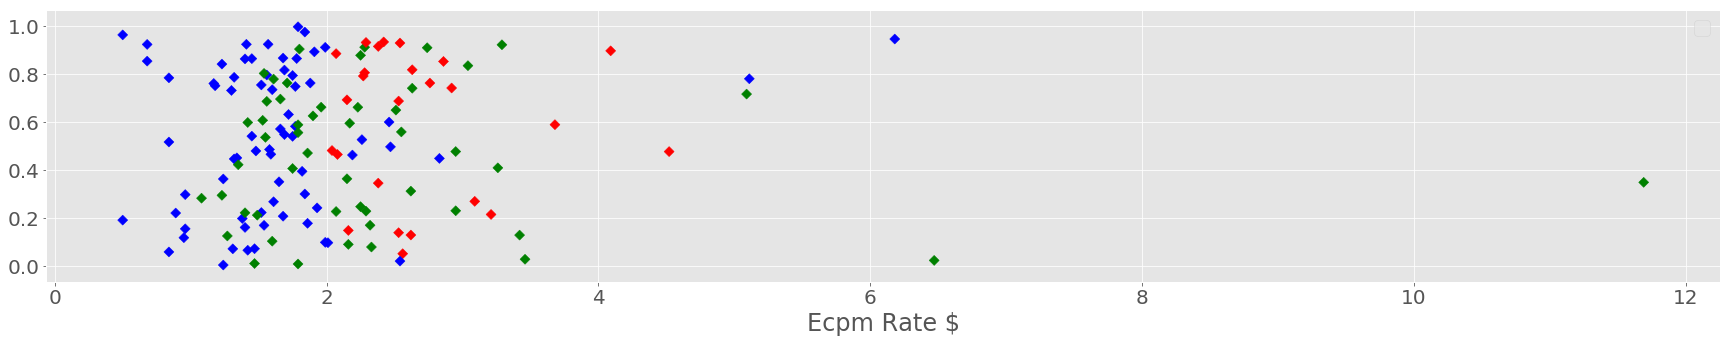

In [16]:
"""
-Color coded scatter plot of three different data metrics
- blue = between1and2ecpm
- green = over2ecpm
- red = under1ecpm
"""


x1 = between1and2ecpm
x2 = over2ecpm
x3 = under1ecpm
x = np.concatenate((x1, x2, x3))

y1 = np.random.rand(74)
y2 = np.random.rand(60)
y3 = np.random.rand(11)
y = np.concatenate((y1, y2, y3))

color_array = ['b'] * 50 + ['g'] * 50 + ['r'] * 25
plt.legend(['between1and2ecpm', 'over2ecpm', 'under1ecpm'])
plt.xlabel('Ecpm Rate $')

plt.scatter(x, y, s=[50], marker='D', c=color_array)
plt.show()

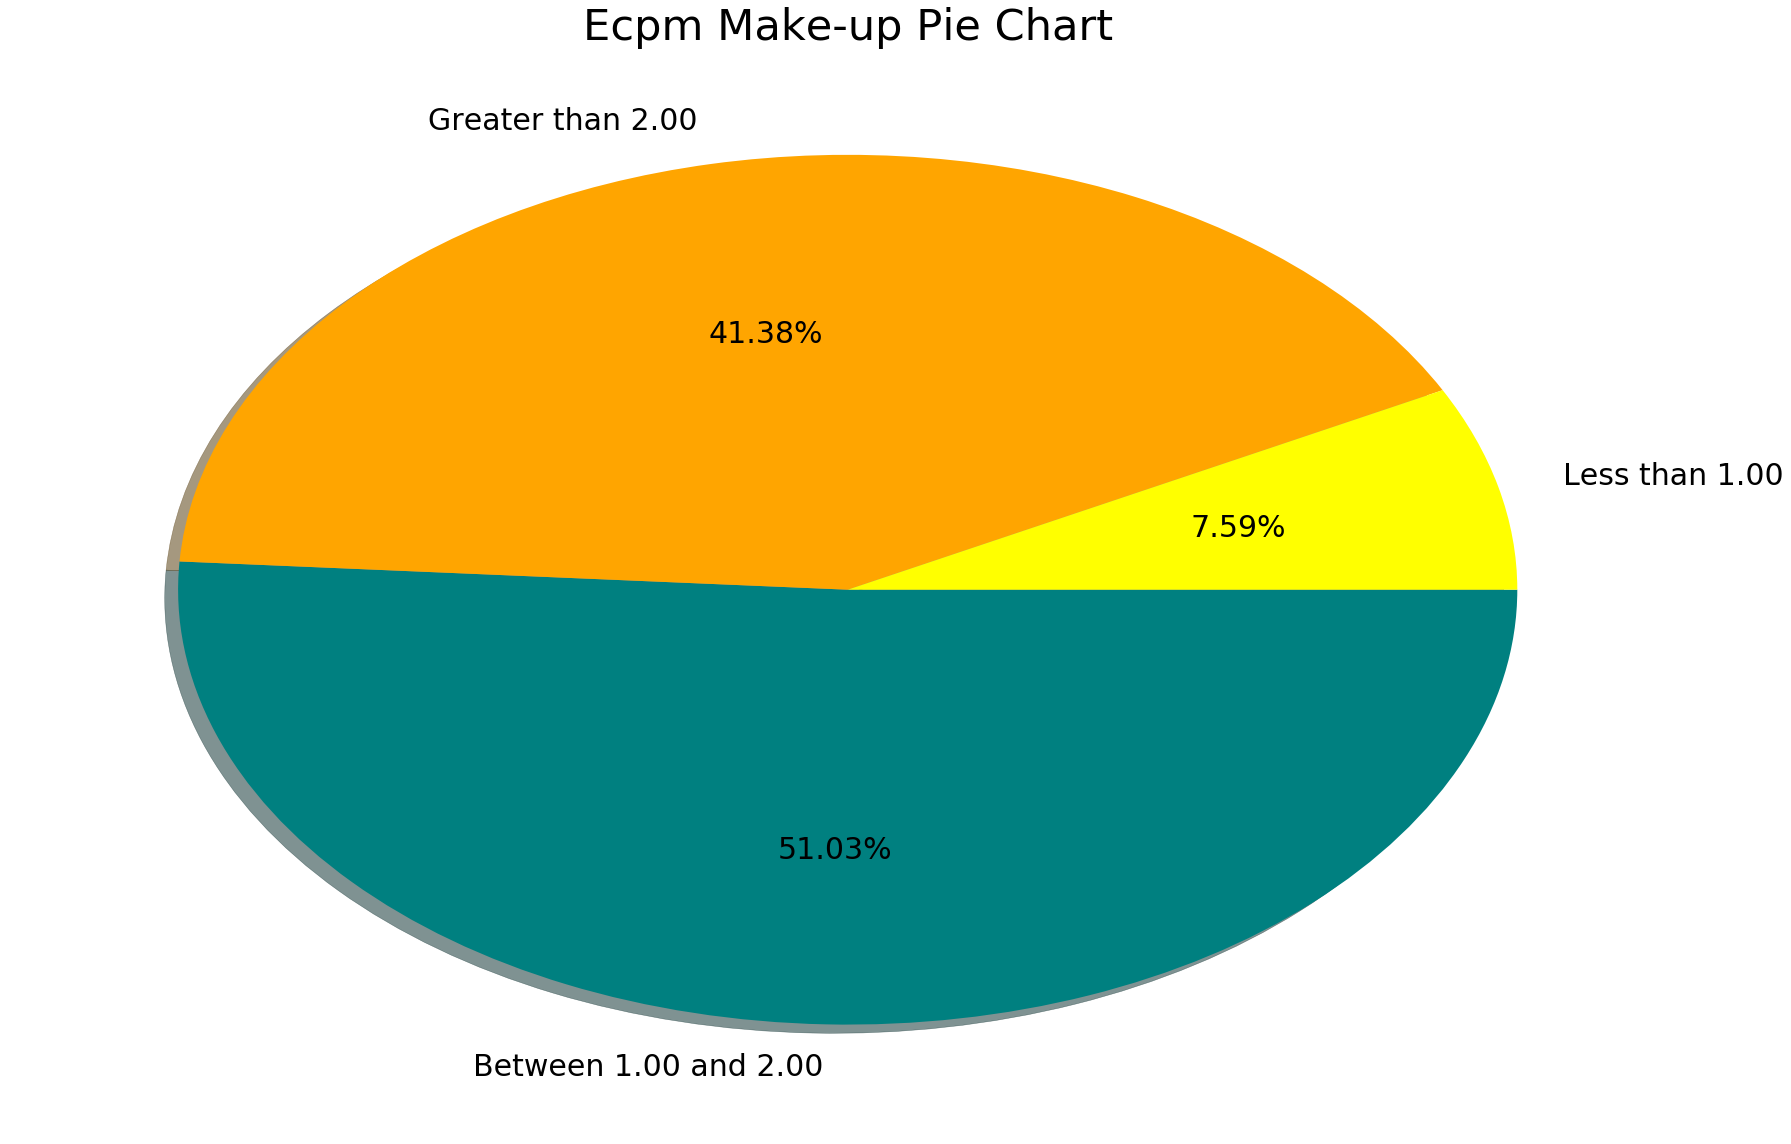

In [18]:
#Ecpm makeup chart distribution 
values = [74, 60, 11]
colors = ['teal', 'orange', 'yellow']
labels = ['Between 1.00 and 2.00', 'Greater than 2.00', 'Less than 1.00']


plt.title('Ecpm Make-up Pie Chart')
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams['font.size'] = 30

plt.pie(values, colors=colors, labels=labels, autopct='%1.2f%%', counterclock=False, shadow=True)

plt.show()

In [19]:
#Keywords that have a viewability of 45% or more

v45 = data_file.loc[vimp > .45, ['Key-values', 'Total Active View % viewable impressions']]

v45

,Key-values,Total Active View % viewable impressions
0,texture,0.6819
3,summer,0.5502
4,favorable,0.6618
5,lineage,0.5745
6,establish,0.6156
7,accompany,0.5704
8,serve,0.4516
9,soul,0.5247
10,primary,0.5537
11,witness,0.6053


In [20]:
"""
-finding out the total downloadable impressions
-each proceeding value after the other is the current value added with the previous value 
  till it reaches the total value in the end which is 79029115

"""
total1 = 0

for i in range(len(dimp)):
    total1 += dimp[i]
    
   
    print(total1)

1208
19342
56515
3740551
3743508
3743708
3745330
3746745
4082619
4118716
4132426
4390385
4678254
4678757
4678810
4683208
4693958
4739683
4739689
4740017
4767826
4929152
4934668
4934692
4934708
4935115
4954570
4957559
6201421
6201454
6226009
6512774
6540133
6540171
6540183
6551368
6551728
6553887
6553965
6553970
6554282
6554687
6554698
6555227
6555232
7209528
7209791
7278700
7278711
7305924
7411700
7421197
7451331
7460452
7534128
7534308
7807119
7807225
7853227
7907731
7912012
7961451
7984004
7984132
8714869
8768502
8795188
8795191
8795947
8797878
10222730
10244989
11439696
11439701
11533144
12512008
12789470
12789474
12790023
12790186
12790216
12790222
12794140
12794164
14913529
14913620
14913622
14944480
14946330
15060427
15864069
15864561
15867789
16164512
16203160
17875949
17876219
17876230
17876294
17899804
20705125
20705227
20706044
20730165
20741556
20741649
20746800
20751473
20795771
20800433
20814699
20814722
20814905
20933457
20938627
20939479
20940931
21277827
21284811
212864

In [21]:
#percentage of downloadable impressions of each keyword 

dimp_total = float(79029115)

for i in range(len(dimp)):
    percent_total = (dimp[i] / dimp_total) *100
    
    
    print(format(percent_total,'.4f'),'%', ' = ',kv[i])

0.0015 %  =  texture
0.0229 %  =  breast
0.0470 %  =  nap
4.6616 %  =  summer
0.0037 %  =  favorable
0.0003 %  =  lineage
0.0021 %  =  establish
0.0018 %  =  accompany
0.4250 %  =  serve
0.0457 %  =  soul
0.0173 %  =  primary
0.3264 %  =  witness
0.3643 %  =  abbey
0.0006 %  =  crude
0.0001 %  =  definition
0.0056 %  =  unity
0.0136 %  =  brake
0.0579 %  =  eagle
0.0000 %  =  confession
0.0004 %  =  new
0.0352 %  =  volume
0.2041 %  =  lick
0.0070 %  =  oven
0.0000 %  =  disgrace
0.0000 %  =  cupboard
0.0005 %  =  peace
0.0246 %  =  quota
0.0038 %  =  collar
1.5739 %  =  exit
0.0000 %  =  leaflet
0.0311 %  =  beginning
0.3629 %  =  divide
0.0346 %  =  level
0.0000 %  =  dimension
0.0000 %  =  objective
0.0142 %  =  duck
0.0005 %  =  smoke
0.0027 %  =  communist
0.0001 %  =  artist
0.0000 %  =  passion
0.0004 %  =  requirement
0.0005 %  =  salad
0.0000 %  =  coal
0.0007 %  =  corner
0.0000 %  =  bet
0.8279 %  =  ground
0.0003 %  =  valley
0.0872 %  =  comprehensive
0.0000 %  =  investig

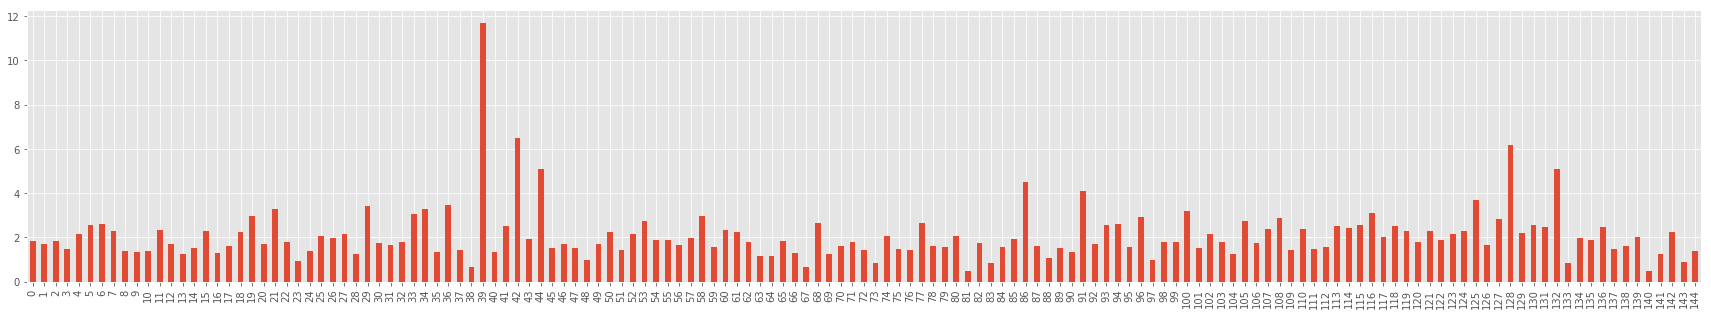

In [24]:
"""
-Bar chart of all 145 keywords ecpm rates
-Instead of the x-axis being labeled by keyword names, its labeled as numbers. Need to find a fix for this.
-0 is the first keyword
"""

x = np.arange(len(data_file['Key-values']))
y = data_file['Ad server average eCPM ($)']
ticks = plt.xticks(x,y)

ax = plt.axes()



plt.rcParams["figure.figsize"] = (30,5)
plt.figure
my_plot = x, y.plot(kind='bar')

# Categories Section

In [32]:
#Category file
data_file2 = pd.read_csv("C:\\Users\\Rawnok\\Desktop\\Dec2017categoriescopy2.csv")



data_file2

,Key-values,Total Active View % viewable impressions,Ad server downloaded impressions,Ad server average eCPM ($),Ad server CTR,Unnamed: 5
0,year,0.510839,38075447,1.49,0.000436,NaN
1,use,0.316045,68630,1.38,0.000000,NaN
2,flexible,0.479229,35594132,1.70,0.000348,NaN
3,album,0.237308,544253,1.58,0.000037,NaN
4,appear,0.488817,22352472,1.95,0.000536,NaN
5,price,0.330707,130516,1.43,0.000031,NaN
6,ring,0.333623,1293,0.88,0.000000,NaN
7,impound,0.260212,711,0.72,0.000000,NaN
8,glass,0.196147,520855,1.72,0.000036,NaN
9,jaw,0.476065,28637848,2.17,0.000586,NaN


In [33]:
ecpm2 = data_file2['Ad server average eCPM ($)']
kv2 = data_file2['Key-values']
vimp2 = data_file2['Total Active View % viewable impressions']
dimp2 = data_file2['Ad server downloaded impressions']
ctr2 = data_file2['Ad server CTR']

In [34]:
#finding out the total downloaded impressions for each category. Each next value is the added value with the previous value
total2 = 0

for i in range(len(dimp2)):
    total2 += dimp2[i]
    
   
    print(total2)

38075447
38144077
73738209
74282462
96634934
96765450
96766743
96767454
97288309
125926157
133336850
135232146
135238269
135240623
135240733
135514251
135518048
135533214
135536078
135544275
135548561
135558352


In [35]:
#percentage rate of each category's downloaded impressions.

dimp2_total = float(135558352)

for i in range(len(dimp2)):
    percent_total = (dimp2[i] / dimp2_total) *100
    
    
    print(format(percent_total,'.4f'),'%', ' = ',kv2[i])

28.0879 %  =  year
0.0506 %  =  use
26.2574 %  =  flexible
0.4015 %  =  album
16.4892 %  =  appear
0.0963 %  =  price
0.0010 %  =  ring
0.0005 %  =  impound
0.3842 %  =  glass
21.1258 %  =  jaw
5.4668 %  =  breathe
1.3981 %  =  indirect
0.0045 %  =  fox
0.0017 %  =  superintendent
0.0001 %  =  appointment
0.2018 %  =  game
0.0028 %  =  viable
0.0112 %  =  brag
0.0021 %  =  sentence
0.0060 %  =  operation
0.0032 %  =  fleet
0.0072 %  =  beef


In [36]:
#keywords under $1.00 ecpm for categories

one_ecpm2 = data_file2.loc[ecpm2 < 1.00, ['Key-values', 'Ad server average eCPM ($)']]

one_ecpm2

,Key-values,Ad server average eCPM ($)
6,ring,0.88
7,impound,0.72


In [37]:
two_ecpm2 = data_file2.loc[ecpm2 > 2.00, ['Key-values', 'Ad server average eCPM ($)']]

two_ecpm2

,Key-values,Ad server average eCPM ($)
9,jaw,2.17
11,indirect,2.13
15,game,2.11
21,beef,2.12


In [38]:
#keywords between $1.00 and $2.00 ecpm

one_two_ecpm2 = data_file2.loc[(ecpm2 > 1.00) & (ecpm2 < 2.00), ['Key-values', 'Ad server average eCPM ($)']]

one_two_ecpm2

,Key-values,Ad server average eCPM ($)
0,year,1.49
1,use,1.38
2,flexible,1.70
3,album,1.58
4,appear,1.95
5,price,1.43
8,glass,1.72
10,breathe,1.86
12,fox,1.78
13,superintendent,1.67


In [39]:
#Keywords that have a viewability of 45% or more for categories

v452 = data_file2.loc[vimp2 > .45, ['Key-values', 'Total Active View % viewable impressions']]

v452

,Key-values,Total Active View % viewable impressions
0,year,0.510839
2,flexible,0.479229
4,appear,0.488817
9,jaw,0.476065
10,breathe,0.565146
11,indirect,0.552661
15,game,0.599713


In [40]:
#total ecpm statistics
"""
22 accounts
mean of $1.65
min = $.72
max = $2.17
"""

ecpm2.describe()

count    22.000000
mean      1.600455
std       0.378273
min       0.720000
25%       1.407500
50%       1.565000
75%       1.840000
max       2.170000
Name: Ad server average eCPM ($), dtype: float64

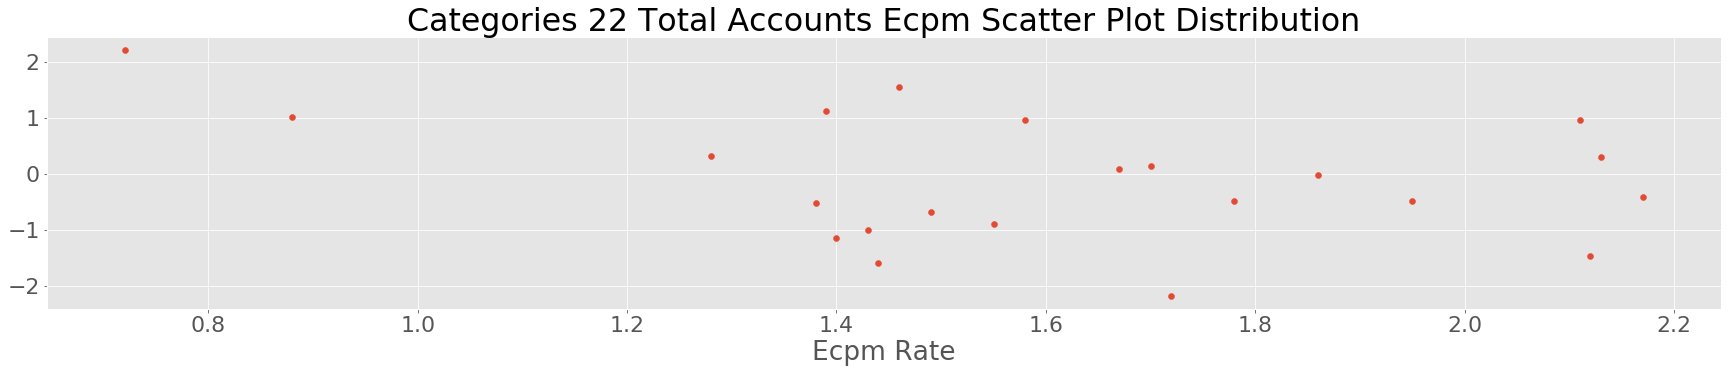

In [41]:
"""
-

"""

y = np.random.randn(22)

plt.scatter(ecpm2, y)

ax = plt.axes()
plt.xlabel('Ecpm Rate')
plt.title('Categories 22 Total Accounts Ecpm Scatter Plot Distribution')
plt.rcParams['font.size'] = 22

plt.rcParams["figure.figsize"] = (30,5)
plt.show()